In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
FoodFacts = pd.read_csv("FoodFacts.csv")
print(FoodFacts.head())
print(FoodFacts.info())

                 code                                                url  \
0  000000000000012866  http://world-en.openfoodfacts.org/product/0000...   
1       0000000024600  http://world-en.openfoodfacts.org/product/0000...   
2       0000000036252  http://world-en.openfoodfacts.org/product/0000...   
3       0000000039259  http://world-en.openfoodfacts.org/product/0000...   
4       0000000039529  http://world-en.openfoodfacts.org/product/0000...   

           creator   created_t      created_datetime last_modified_t  \
0  date-limite-app  1447004364  2015-11-08T17:39:24Z      1447004364   
1  date-limite-app  1434530704  2015-06-17T08:45:04Z      1434535914   
2          tacinte  1422221701  2015-01-25T21:35:01Z      1422221855   
3          tacinte  1422221773  2015-01-25T21:36:13Z      1422221926   
4         teolemon  1420147051  2015-01-01T21:17:31Z      1439141740   

  last_modified_datetime            product_name generic_name quantity  \
0   2015-11-08T17:39:24Z  Poêlée à l

/Users/zhaoxiaoxing/anaconda/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Find sugar consumption ranklist

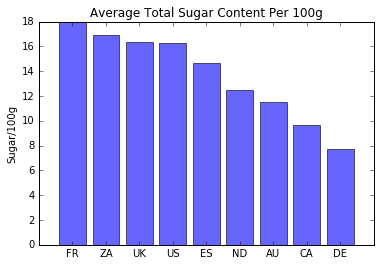

In [44]:
# Convert the countries name to lowercase
FoodFacts.countries=FoodFacts.countries.str.lower()
# Clacute the mean value
def mean(num):
    return float(sum(num)) / len(num)

# Filter not null value 
world_sugars = FoodFacts[FoodFacts.sugars_100g.notnull()]

def get_sugars(country):
    return world_sugars[world_sugars.countries == country].sugars_100g.tolist()

# Get list of sugars per 100g for some countries
fr_sugars = get_sugars('france') + get_sugars('en:fr')
za_sugars = get_sugars('south africa')
uk_sugars = get_sugars('united kingdom') + get_sugars('en:gb')
us_sugars = get_sugars('united states') + get_sugars('en:us') + get_sugars('us')
sp_sugars = get_sugars('spain') + get_sugars('españa') + get_sugars('en:es')
nd_sugars = get_sugars('netherlands') + get_sugars('holland')
au_sugars = get_sugars('australia') + get_sugars('en:au')
ca_sugars = get_sugars('canada') + get_sugars('en:cn')
de_sugars = get_sugars('germany')
#cn_sugars = get_sugars('china')

countries = ['FR','ZA','UK','US','ES','ND','AU','CA','DE']
sugars_mean_list = [mean(fr_sugars),
                    mean(za_sugars),
                    mean(uk_sugars),
                    mean(us_sugars),
                    mean(sp_sugars),
                    mean(nd_sugars),
                    mean(au_sugars),
                    mean(ca_sugars),
                    mean(de_sugars)]

sugars_mean_list = sorted(sugars_mean_list,reverse=True)
y_axis = np.arange(len(countries))

plt.bar(y_axis, sugars_mean_list, align='center', alpha=.6)
plt.title('Average Total Sugar Content Per 100g')
plt.xticks(y_axis, countries)
plt.ylabel('Sugar/100g')

plt.show()

# Find Caffeine consumption

In [51]:
list(FoodFacts.columns.values)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [62]:
FoodFacts['fiber_100g'][FoodFacts['countries']=='united kingdom'].head(200)

5        NaN
11       4.7
14       1.8
17       NaN
18       NaN
26       NaN
53       NaN
60       NaN
75       NaN
84       0.0
85       NaN
97       NaN
104      3.1
105      0.5
106      NaN
108      0.5
114      NaN
119      NaN
121      3.1
122      NaN
143      3.1
181      1.8
192      NaN
195      2.5
198      0.5
202      NaN
204      3.0
205      3.0
206      3.0
208     10.6
        ... 
1679     NaN
1699     NaN
1749     NaN
1758     NaN
1770     NaN
1775     NaN
1776     NaN
1777     0.5
1790    16.5
1806     2.5
1823     NaN
1824     NaN
1894     NaN
1895     NaN
1898     NaN
1904     9.6
1906     NaN
1913     NaN
1916     0.5
1922     NaN
1931     1.3
1947     NaN
1967     3.1
2047     NaN
2070     NaN
2075     2.0
2110     4.4
2113     4.2
2135     3.1
2179     0.0
Name: fiber_100g, dtype: float64

In [45]:
# Filter the null value of the FoodFacts
world_caffeine = FoodFacts[FoodFacts.caffeine_100g.notnull()]
def get_caffeine(country):
    return world_caffeine[world_caffeine.countries == country].caffeine_100g.tolist()

# Get list of caffeine per 100g for some countries
fr_caffeine = get_caffeine('france') + get_caffeine('en:fr')
#za_caffeine = get_caffeine('south africa')
#uk_caffeine = get_caffeine('united kingdom') + get_caffeine('en:gb')
#us_caffeine = get_caffeine('united states') + get_caffeine('en:us') + get_caffeine('us')
#sp_caffeine = get_caffeine('spain') + get_caffeine('españa') + get_caffeine('en:es')
#cn_caffeine = get_caffeine('china')
#nd_caffeine = get_caffeine('netherlands') + get_caffeine('holland')
#au_caffeine = get_caffeine('australia') + get_caffeine('en:au')
#jp_caffeine = get_caffeine('japan') + get_caffeine('en:jp')
#de_caffeine = get_caffeine('germany')

countries = ['FR','ZA','UK','USA','ES','CN','ND','AU','JP','DE']
caffeine_mean_list = [mean(fr_caffeine),
                      #mean(uk_caffeine),
                     # mean(us_caffeine),
                     # mean(sp_caffeine),
                     # mean(cn_caffeine),
                     # mean(nd_caffeine),
                      # mean(jp_caffeine),
                      #mean(de_sodium)]

#caffeine_mean_list = sorted(caffeine_mean_list, reverse=True)
#y_axis = np.arange(len(countries))

plt.bar(y_axis, caffeine_mean_list, align='center', alpha=.5)
plt.title('Average Caffeine Content per 100g')
plt.xticks(y_axis, countries)
plt.ylabel('Caffeine/100g')

plt.show()

SyntaxError: invalid syntax (<ipython-input-45-7797fe1af5cf>, line 32)